<a href="https://colab.research.google.com/github/gsf31/python_data/blob/main/decomposition_over_residues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

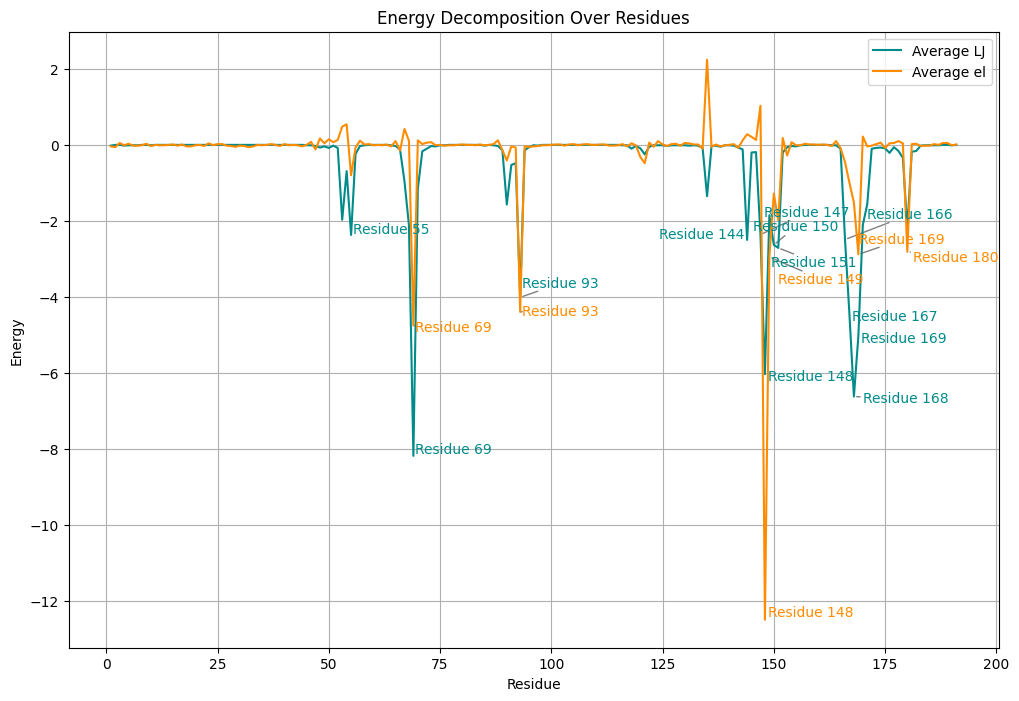

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Função para ler o arquivo .dat, ignorando a linha de cabeçalho
def read_dat_file(filename):
    # Utiliza genfromtxt para lidar com possíveis linhas de cabeçalho
    data = np.genfromtxt(filename, delimiter=None, skip_header=1)
    return data

# Função para plotar o gráfico de decomposição de energia
def plot_energy_decomposition(data, output_file):
    residue = data[:, 0]
    average_lj = data[:, 1]
    average_el = data[:, 2]

    plt.figure(figsize=(12, 8))

    # Plotar os dados
    plt.plot(residue, average_lj, label='Average LJ', color='darkcyan')
    plt.plot(residue, average_el, label='Average el', color='darkorange')

    # Personalizar o gráfico
    plt.title('Energy Decomposition Over Residues')
    plt.xlabel('Residue')
    plt.ylabel('Energy')
    plt.legend()
    plt.grid(True)

    # Adicionar rótulos para os pontos com valores mais negativos que -1
    texts = []
    for idx in range(len(residue)):
        if average_lj[idx] < -2.2:
            texts.append(plt.text(residue[idx], average_lj[idx], f'Residue {int(residue[idx])}', color='darkcyan'))
        if average_el[idx] < -2.2:
            texts.append(plt.text(residue[idx], average_el[idx], f'Residue {int(residue[idx])}', color='darkorange'))

    # Ajustar os rótulos para não sobrepor
    adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))

    # Salvar o gráfico em alta resolução
    plt.savefig(output_file, dpi=300)
    plt.show()

# Caminho do arquivo .dat
filename = '/content/decomp.dat'
output_file = 'decomposition_plot.png'  # Nome do arquivo de saída

# Ler os dados do arquivo
data = read_dat_file(filename)

# Plotar e salvar o gráfico de decomposição de energia
plot_energy_decomposition(data, output_file)





